MISCELLANEOUS testing notebook with basic UNET.

In [ ]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.utils import np_utils
#from keras.datasets import cifar10
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras import regularizers

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
import numpy as np

In [ ]:
from tensorflow.keras.layers import Input, UpSampling2D, concatenate 
from tensorflow.keras.models import Model

inputs = Input((32,32,3))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)

drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv10 = Conv2D(3, 3,  padding = 'same')(conv9)

model = Model(inputs = inputs, outputs = conv10)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
train_dir = '/content/gdrive/My Drive/NEUTROPHIL/Train'
test_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test'
valid_dir = '/content/gdrive/My Drive/NEUTROPHIL/Valid'

train_dir_in = '/content/gdrive/My Drive/NEUTROPHIL/Train/32NOISYMAG'
test_dir_in = '/content/gdrive/My Drive/NEUTROPHIL/Test/32NOISYMAG'
valid_dir_in = '/content/gdrive/My Drive/NEUTROPHIL/Valid/32NOISYMAG'

train_dir_out = '/content/gdrive/My Drive/NEUTROPHIL/Train/32'
test_dir_out = '/content/gdrive/My Drive/NEUTROPHIL/Test/32'
valid_dir_out = '/content/gdrive/My Drive/NEUTROPHIL/Valid/32'

In [ ]:
temp = os.listdir(train_dir)
print(temp[:10])

temp2 = os.listdir(test_dir_out)
print(temp2[:10])

['Original', '240', '32', '32MAG', '32NOISYMAG', '32GREY']
['32']


In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
mask_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)
maskValid_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 20 using train_datagen generator
image_generator = train_datagen.flow_from_directory(
        train_dir_in,  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 32x32
        batch_size= 32,
        color_mode="rgb",
        class_mode=None,
        shuffle=False
        # Since we use binary_crossentropy loss, we need binary labels
        )

mask_generator = mask_datagen.flow_from_directory(
      train_dir_out,
      target_size=(32, 32),
      batch_size= 32,
      color_mode="rgb",
      class_mode=None,
      shuffle=False
      )

train_generator = zip(image_generator, mask_generator)


##############################

imageValid_generator = valid_datagen.flow_from_directory(
        valid_dir_in,  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 32x32
        batch_size= 32,
        color_mode="rgb",
        class_mode=None,
        shuffle=False
        # Since we use binary_crossentropy loss, we need binary labels
        )

maskValid_generator = maskValid_datagen.flow_from_directory(
      valid_dir_out,
      target_size=(32, 32),
      batch_size= 32,
      color_mode="rgb",
      class_mode=None,
      shuffle=False
      )

valid_generator = zip(imageValid_generator, maskValid_generator)

Found 4002 images belonging to 1 classes.
Found 4002 images belonging to 1 classes.
Found 996 images belonging to 1 classes.
Found 996 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the metric that will determine the earlyStopping
# patience defines the number of epochs we wait before stopping training 
# when the monitored metric does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=125,  
      epochs=100,
      validation_data=valid_generator,
      validation_steps=30,  # 1000 images = batch_size * steps
      verbose=1,
      callbacks=[early_stopping])


Epoch 1/100
125/125 [==============================] - 3391s 27s/step - loss: 0.0496 - mae: 0.2034 - val_loss: 0.0227 - val_mae: 0.1427
Epoch 2/100
125/125 [==============================] - 18s 144ms/step - loss: 0.0193 - mae: 0.1390 - val_loss: 0.0225 - val_mae: 0.1412
Epoch 3/100
125/125 [==============================] - 15s 119ms/step - loss: 0.0185 - mae: 0.1348 - val_loss: 0.0218 - val_mae: 0.1424
Epoch 4/100
125/125 [==============================] - 15s 119ms/step - loss: 0.0178 - mae: 0.1317 - val_loss: 0.0206 - val_mae: 0.1328
Epoch 5/100
125/125 [==============================] - 15s 116ms/step - loss: 0.0171 - mae: 0.1280 - val_loss: 0.0198 - val_mae: 0.1311
Epoch 6/100
125/125 [==============================] - 15s 117ms/step - loss: 0.0162 - mae: 0.1232 - val_loss: 0.0207 - val_mae: 0.1369
Epoch 7/100
125/125 [==============================] - 15s 118ms/step - loss: 0.0158 - mae: 0.1211 - val_loss: 0.0190 - val_mae: 0.1294
Epoch 8/100
125/125 [===========================

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)
mask_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 20 using train_datagen generator
image_generator = test_datagen.flow_from_directory(
        test_dir_in,  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 32x32
        batch_size= 32,
        color_mode="rgb",
        class_mode=None,
        shuffle=False
        # Since we use binary_crossentropy loss, we need binary labels
        )

mask_generator = mask_datagen.flow_from_directory(
      test_dir_out,
      target_size=(32, 32),
      batch_size= 32,
      color_mode="rgb",
      class_mode=None,
      shuffle=False
      )

test_generator = zip(image_generator, mask_generator)

Found 1248 images belonging to 1 classes.
Found 1248 images belonging to 1 classes.


In [ ]:
model.evaluate_generator(
    test_generator, steps=39, verbose=1
)


39/39 [==============================] - 600s 15s/step - loss: 0.0150 - mae: 0.1049


[0.015022306703031063, 0.1048872321844101]

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


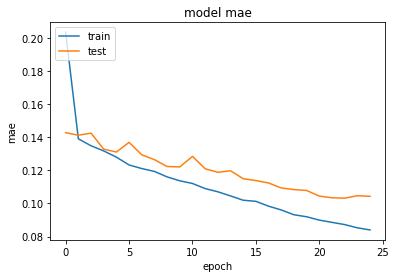

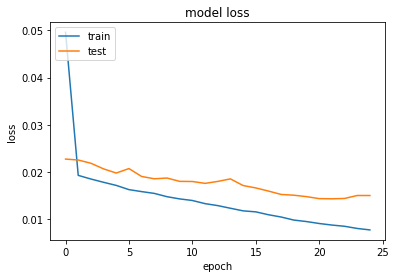

In [ ]:
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_dir_in2 = '/content/gdrive/My Drive/NEUTROPHIL/Test/32NOISYMAG/32NOISYMAG'
test_dir_out2 = '/content/gdrive/My Drive/NEUTROPHIL/Test/32/32'
temp = os.listdir(test_dir_in2)
print(temp[:10])

['B_42_287.jpeg', 'A_38_7538.jpeg', 'B_41_8131.jpeg', 'B_3_473.jpeg', 'A_3_1778.jpeg', 'A_38_4581.jpeg', 'B_39_4255.jpeg', 'B_39_9607.jpeg', 'B_3_1778.jpeg', 'B_38_6125.jpeg']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


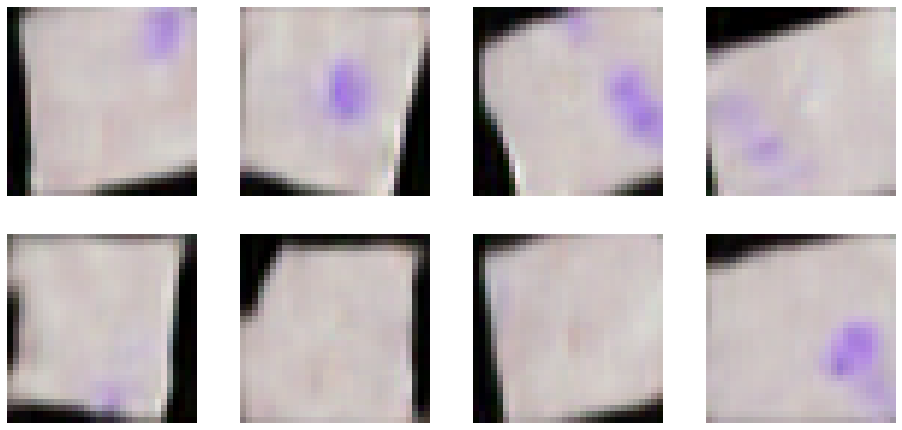

In [ ]:
from PIL import Image
import numpy as np

size = 32, 32

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_pix = [os.path.join(test_dir_in2, fname) 
                for fname in temp[pic_index-8:pic_index]]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  #img = mpimg.imread(img_path)
  img = Image.open(img_path)
  basewidth = 32
  img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
  pix = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
  pix = pix.reshape(1,32,32,3)
  pix = pix.astype('float32')
  pix /= 255.
  pred = model.predict(pix)
  plt.imshow((pred[0]))
plt.show()

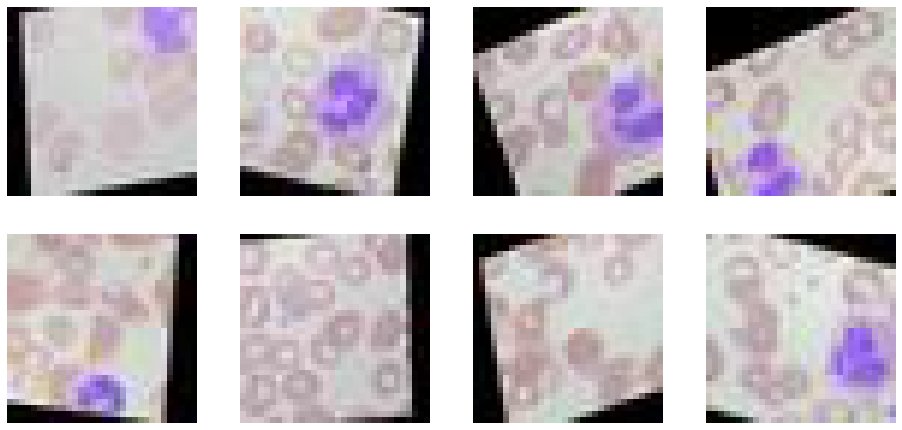

In [ ]:
from PIL import Image
import numpy as np

size = 32, 32

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_pix = [os.path.join(test_dir_out2, fname) 
                for fname in temp[pic_index-8:pic_index]]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  #img = mpimg.imread(img_path)
  img = Image.open(img_path)
  plt.imshow((img))
plt.show()

Some recovery which shows this method has some merit.

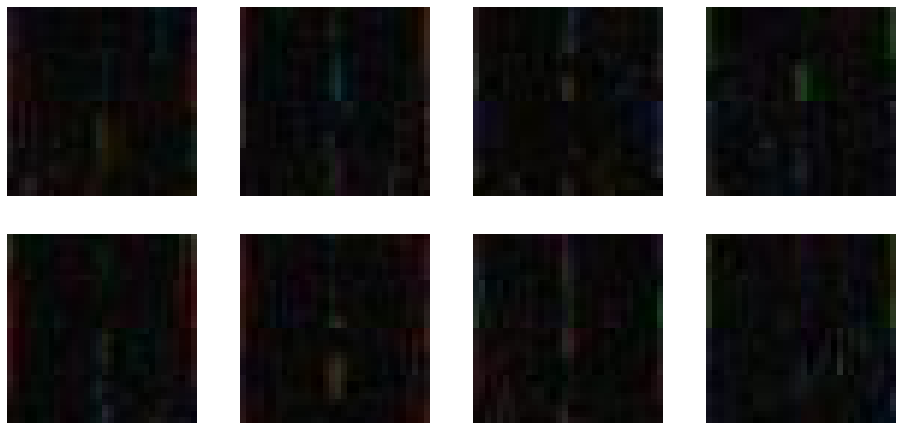

In [ ]:
from PIL import Image
import numpy as np

size = 32, 32

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_pix = [os.path.join(test_dir_in2, fname) 
                for fname in temp[pic_index-8:pic_index]]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  #img = mpimg.imread(img_path)
  img = Image.open(img_path)
  plt.imshow((img))
plt.show()

# **Grey scale output**

In [ ]:
from tensorflow.keras.layers import Input, UpSampling2D, concatenate 
from tensorflow.keras.models import Model

inputs = Input((32,32,3))
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)

#convA = Conv2D(1024, 7, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)


## Now the decoder starts

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv10 = Conv2D(1, 3,  padding = 'same')(conv9)

model = Model(inputs = inputs, outputs = conv10)

In [ ]:
train_dir = '/content/gdrive/My Drive/NEUTROPHIL/Train'
test_dir = '/content/gdrive/My Drive/NEUTROPHIL/Test'
valid_dir = '/content/gdrive/My Drive/NEUTROPHIL/Valid'

train_dir_in = '/content/gdrive/My Drive/NEUTROPHIL/Train/32NOISYMAG'
test_dir_in = '/content/gdrive/My Drive/NEUTROPHIL/Test/32NOISYMAG'
valid_dir_in = '/content/gdrive/My Drive/NEUTROPHIL/Valid/32NOISYMAG'

train_dir_out = '/content/gdrive/My Drive/NEUTROPHIL/Train/32GREY'
test_dir_out = '/content/gdrive/My Drive/NEUTROPHIL/Test/32GREY'
valid_dir_out = '/content/gdrive/My Drive/NEUTROPHIL/Valid/32GREY'

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
mask_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)
maskValid_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 20 using train_datagen generator
image_generator = train_datagen.flow_from_directory(
        train_dir_in,  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 32x32
        batch_size= 32,
        color_mode="rgb",
        class_mode=None,
        shuffle=False
        # Since we use binary_crossentropy loss, we need binary labels
        )

mask_generator = mask_datagen.flow_from_directory(
      train_dir_out,
      target_size=(32, 32),
      batch_size= 32,
      color_mode="grayscale",
      class_mode=None,
      shuffle=False
      )

train_generator = zip(image_generator, mask_generator)


##############################

imageValid_generator = valid_datagen.flow_from_directory(
        valid_dir_in,  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 32x32
        batch_size= 32,
        color_mode="rgb",
        class_mode=None,
        shuffle=False
        # Since we use binary_crossentropy loss, we need binary labels
        )

maskValid_generator = maskValid_datagen.flow_from_directory(
      valid_dir_out,
      target_size=(32, 32),
      batch_size= 32,
      color_mode="grayscale",
      class_mode=None,
      shuffle=False
      )

valid_generator = zip(imageValid_generator, maskValid_generator)

Found 4002 images belonging to 1 classes.
Found 4002 images belonging to 1 classes.
Found 996 images belonging to 1 classes.
Found 996 images belonging to 1 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the metric that will determine the earlyStopping
# patience defines the number of epochs we wait before stopping training 
# when the monitored metric does not improve
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['mae'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=125,  
      epochs=100,
      validation_data=valid_generator,
      validation_steps=30,  # 1000 images = batch_size * steps
      verbose=1,
      callbacks=[early_stopping])


Epoch 1/100
125/125 [==============================] - 1331s 11s/step - loss: 1.2617 - mae: 0.2904 - val_loss: 0.0461 - val_mae: 0.1502
Epoch 2/100
125/125 [==============================] - 16s 128ms/step - loss: 0.0400 - mae: 0.1438 - val_loss: 0.0443 - val_mae: 0.1460
Epoch 3/100
125/125 [==============================] - 14s 115ms/step - loss: 0.0382 - mae: 0.1397 - val_loss: 0.0431 - val_mae: 0.1418
Epoch 4/100
125/125 [==============================] - 15s 116ms/step - loss: 0.0377 - mae: 0.1384 - val_loss: 0.0424 - val_mae: 0.1424
Epoch 5/100
125/125 [==============================] - 14s 116ms/step - loss: 0.0371 - mae: 0.1366 - val_loss: 0.0418 - val_mae: 0.1426
Epoch 6/100
125/125 [==============================] - 14s 114ms/step - loss: 0.0361 - mae: 0.1347 - val_loss: 0.0417 - val_mae: 0.1448
Epoch 7/100
125/125 [==============================] - 14s 116ms/step - loss: 0.0350 - mae: 0.1323 - val_loss: 0.0398 - val_mae: 0.1366
Epoch 8/100
125/125 [===========================

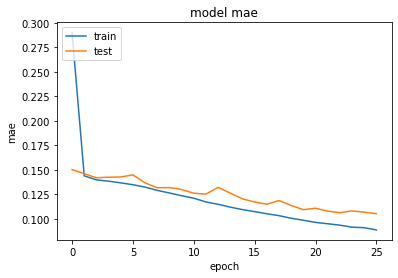

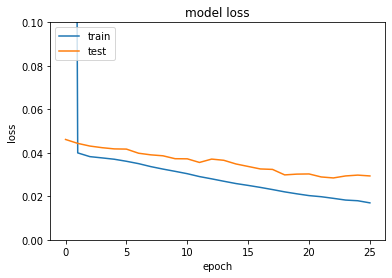

In [ ]:
# summarize history for accuracy
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim([0, 0.1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
test_dir_in2 = '/content/gdrive/My Drive/NEUTROPHIL/Test/32NOISYMAG/32NOISYMAG'
test_dir_out2 = '/content/gdrive/My Drive/NEUTROPHIL/Test/32GREY/32GREY'
temp = os.listdir(test_dir_in2)
print(temp[:10])

['B_42_287.jpeg', 'A_38_7538.jpeg', 'B_41_8131.jpeg', 'B_3_473.jpeg', 'A_3_1778.jpeg', 'A_38_4581.jpeg', 'B_39_4255.jpeg', 'B_39_9607.jpeg', 'B_3_1778.jpeg', 'B_38_6125.jpeg']


(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)
(32, 32)


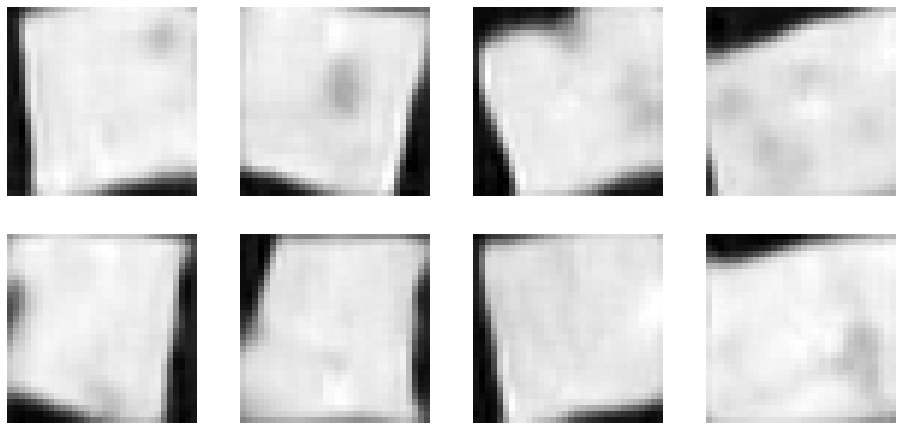

In [ ]:
from PIL import Image
import numpy as np

size = 32, 32

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_pix = [os.path.join(test_dir_in2, fname) 
                for fname in temp[pic_index-8:pic_index]]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  #img = mpimg.imread(img_path)
  img = Image.open(img_path)
  basewidth = 32
  img = img.resize((basewidth,basewidth), Image.ANTIALIAS)
  pix = np.array(img.getdata()).reshape(img.size[0], img.size[1], 3)
  pix = pix.reshape(1,32,32,3)
  pix = pix.astype('float32')
  pix /= 255.
  pred = model.predict(pix)
  pred = pred[0].reshape(32,32)
  #print(pred.shape)
  plt.imshow((pred[:][:]),cmap="gray")
plt.show()

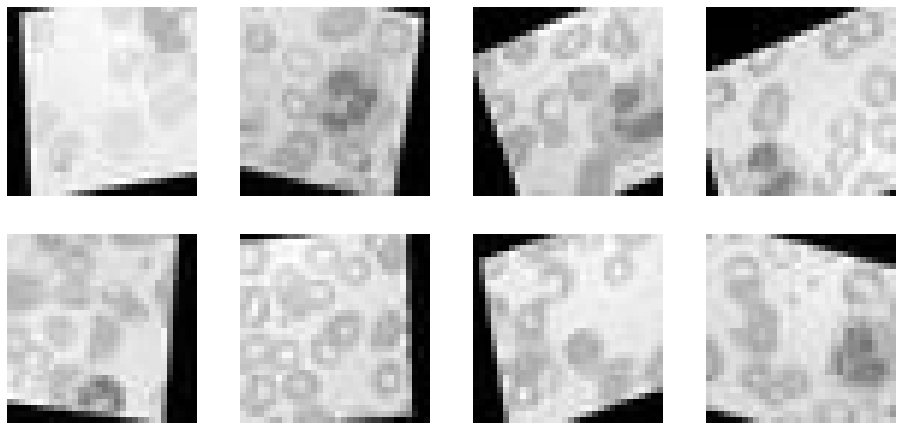

In [ ]:
from PIL import Image
import numpy as np
import cv2

size = 32, 32

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_pix = [os.path.join(test_dir_out2, fname) 
                for fname in temp[pic_index-8:pic_index]]

for i, img_path in enumerate(next_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  #img = mpimg.imread(img_path)
  #img = Image.open(img_path)
  image = cv2.imread(img_path)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  plt.imshow(gray,cmap="gray")
plt.show()

In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
test_datagen = ImageDataGenerator(rescale=1./255)
mask_datagen = ImageDataGenerator(rescale=1./255)
# Flow training images in batches of 20 using train_datagen generator
image_generator = test_datagen.flow_from_directory(
        test_dir_in,  # This is the source directory for training images
        target_size=(32, 32),  # All images will be resized to 32x32
        batch_size= 32,
        color_mode="rgb",
        class_mode=None,
        shuffle=False
        # Since we use binary_crossentropy loss, we need binary labels
        )

mask_generator = mask_datagen.flow_from_directory(
      test_dir_out,
      target_size=(32, 32),
      batch_size= 32,
      color_mode="rgb",
      class_mode=None,
      shuffle=False
      )

test_generator = zip(image_generator, mask_generator)

Found 1248 images belonging to 1 classes.
Found 1248 images belonging to 1 classes.


In [ ]:
model.evaluate_generator(
    test_generator, steps=39, verbose=1
)


39/39 [==============================] - 454s 12s/step - loss: 0.0301 - mae: 0.1066


[0.030077384784817696, 0.10657428205013275]